<a href="https://colab.research.google.com/github/JeostonJunior/Delivery-Cadastro-Clientes/blob/master/Analise_de_Dados_Vacinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALISE DE VACINAS.XLSX

CLASSE GERAL - TRATAMENTO E ESTATÍSTICAS DOS DADOS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

class Vacinas:
    
    def __init__(self, dado):
        self.__dado = dado
        tratar = self.__dado['Município'and 'Fabricante'] != '-'
        self.__dado = self.__dado[tratar]
        display(self.__dado)

    def soma_dose(self, doses):
        return self.__dado[doses].sum()
    
    def regiao_doses(self, dose):
        return (self.__dado[['Região', dose]].groupby('Região').sum())
        
    def regiao_estado(self, regiao, estado, doses):
        return self.__dado[[regiao, estado, doses]].groupby(['Região','UF']).sum()
    
    def soma_estado(self, estado, doses):
        return self.__dado[[estado, doses]].groupby(['UF']).sum()

    def soma_municipios(self, municipio, doses):
        return self.__dado[['UF','Cód. IBGE' , municipio, doses]].groupby(['UF','Cód. IBGE','Município']).sum()
    
    def doses_estado(self, estado, doses):
        return self.__dado.loc[self.__dado['UF'] == estado, [doses]].sum()
    
    def total_capital(self, municipio, dose):
        return self.__dado.loc[self.__dado['Município'] == municipio, [dose]].sum()      
    
    def capital(self, municipio, dose):
        return self.__dado.loc[self.__dado['Município'] == municipio, ['Município', 'Fabricante', dose]]
                     
    def media_doses_estado(self, estado, dose):
        return round(self.__dado.loc[self.__dado['UF'] == estado, [dose]].mean(), 1)
    
    def media_estado_dose2(self, estado):
        return round(self.__dado[[estado, 'Dose 2']].mean(), 1)
       
    def media_estado_geral(self):
        return round(self.__dado[['UF', 'Dose 2']].groupby(['UF']).mean(), 1)
    
    def media_estado_geral1(self):
        return round(self.__dado[['UF', 'Dose 1']].groupby(['UF']).mean(), 1)
    
    def media_estado(self, estado):
        return round(self.__dado[[estado,'Dose 1', 'Dose 2']].mean(), 1)
    
    def media_doses_municipio(self, municipio, dose):
        return round(self.__dado.loc[self.__dado['Município'] == municipio, [dose]].mean(), 1)
    
    def max_municipio(self, estado):
        maior_dose = self.__dado.loc[self.__dado['UF'] == estado]
        maior_dose = maior_dose[['Município', 'Dose 2']].groupby('Município').sum()
        maior_dose = maior_dose.idxmax(axis=0).iloc[0]
        return maior_dose
    
    def min_municipio(self, estado):
        menor_dose = self.__dado.loc[self.__dado['UF'] == estado]
        menor_dose = menor_dose[['Município', 'Dose 2']].groupby('Município').sum()
        menor_dose = menor_dose.idxmin(axis=0).iloc[0]
        return menor_dose
    
    def max_fabricante(self, estado):
        maior_fabricante = self.__dado.loc[self.__dado['UF'] == estado]
        maior_fabricante = maior_fabricante[['Fabricante', 'Doses Aplicadas']].groupby('Fabricante').sum()
        maior_fabricante = maior_fabricante.idxmax(axis=0).iloc[0]
        return maior_fabricante
    
    def min_fabricante(self, estado):
        menor_fabricante = self.__dado.loc[self.__dado['UF'] == estado]
        menor_fabricante = menor_fabricante[['Fabricante', 'Doses Aplicadas']].groupby('Fabricante').sum()
        menor_fabricante = menor_fabricante.idxmin(axis=0).iloc[0]
        return menor_fabricante
    
    
vacina = Vacinas(pd.read_excel('vacinas.xlsx'))



#display(vacina.doses("Dose 1"))
#display(vacina.regioes('Região', "Doses Aplicadas"))
#display(vacina.regiao_doses('Região', "Doses Aplicadas")) 
#display(vacina.regiao_estado('Região','UF', "Doses Aplicadas"))
#display(vacina.estado('UF', "Doses Aplicadas"))
#display(vacina.estado('UF', "Dose 1"))
#display(vacina.municipios('UF','Cód. IBGE','Município','Doses Aplicadas'))
#display(vacina.municipios('UF','Cód. IBGE','Município','Dose 1'))
#display(vacina.media_doses_estado('BA', 'Dose 1'))
#display(vacina.media_estado('UF'))
#display(vacina.media_estado_dose2('UF'))
#display(vacina.media_doses_municipio('Salvador', 'Dose 1'))
#display(vacina.min_municipio('BA'))
#display(vacina.max_municipio('BA'))
#display(vacina.max_fabricante('BA'))
#display(vacina.total_capital('Salvador', 'Doses Aplicadas'))




        


,Município,Cód. IBGE,UF,Região,Fabricante,Doses Aplicadas,Dose 1,Dose 2
0,Abadia De Goiás,520005,GO,Centro-Oeste,FIOCRUZ/ASTRAZENECA,3560,2633,927
1,Abadia De Goiás,520005,GO,Centro-Oeste,BUTANTAN/SINOVAC,3125,1682,1443
2,Abadia De Goiás,520005,GO,Centro-Oeste,PFIZER/BIONTECH,1297,1297,0
3,Abadia De Goiás,520005,GO,Centro-Oeste,JANSSEN,65,0,0
4,Abadia Dos Dourados,310010,MG,Sudeste,FIOCRUZ/ASTRAZENECA,3624,2711,913
...,...,...,...,...,...,...,...,...
21878,Zé Doca,211400,MA,Nordeste,JANSSEN,362,0,0
21879,Zortéa,421985,SC,Sul,FIOCRUZ/ASTRAZENECA,1483,928,555
21880,Zortéa,421985,SC,Sul,BUTANTAN/SINOVAC,1200,706,494
21881,Zortéa,421985,SC,Sul,PFIZER/BIONTECH,855,854,1


In [2]:
class Grafico(Vacinas):
    def __init__(self, dado):
        super().__init__(dado)
        self.__dado = dado
      
        
    def codigo_capital(self, dose):
        codigo_capital = [110020,130260,120040,500270,160030,530010,140010,510340,172100,355030,221100,330455,150140,520870,292740,420540,
                 211130,270430,431490,410690,310620,230440,261160,250750,280030,240810,320530]
        
        capital = self.__dado[self.__dado['Cód. IBGE'].isin(codigo_capital)]

        capital = capital[['Município', dose]].groupby(['Município']).sum()
        return capital
    
    def capitais(self, municipio):
        codigo_capital = [110020,130260,120040,500270,160030,530010,140010,510340,172100,355030,221100,330455,150140,520870,292740,420540,
                 211130,270430,431490,410690,310620,230440,261160,250750,280030,240810,320530]
        
        capital = self.__dado[self.__dado['Cód. IBGE'].isin(codigo_capital)]
        capital = capital[['Município']].groupby([municipio]).sum()
        return capital
    
    def regiao_doses(self, dose):
        return (self.__dado[['Região', dose]].groupby('Região').sum())
    
    def media_estado_geral(self):
        return round(self.__dado[['UF', 'Dose 2']].groupby(['UF']).mean(), 1)
    
    def media_estado_geral1(self):
        return round(self.__dado[['UF', 'Dose 1']].groupby(['UF']).mean(), 1)
    
            

grafico = Grafico(pd.read_excel('vacinas.xlsx'))


,Município,Cód. IBGE,UF,Região,Fabricante,Doses Aplicadas,Dose 1,Dose 2
0,Abadia De Goiás,520005,GO,Centro-Oeste,FIOCRUZ/ASTRAZENECA,3560,2633,927
1,Abadia De Goiás,520005,GO,Centro-Oeste,BUTANTAN/SINOVAC,3125,1682,1443
2,Abadia De Goiás,520005,GO,Centro-Oeste,PFIZER/BIONTECH,1297,1297,0
3,Abadia De Goiás,520005,GO,Centro-Oeste,JANSSEN,65,0,0
4,Abadia Dos Dourados,310010,MG,Sudeste,FIOCRUZ/ASTRAZENECA,3624,2711,913
...,...,...,...,...,...,...,...,...
21878,Zé Doca,211400,MA,Nordeste,JANSSEN,362,0,0
21879,Zortéa,421985,SC,Sul,FIOCRUZ/ASTRAZENECA,1483,928,555
21880,Zortéa,421985,SC,Sul,BUTANTAN/SINOVAC,1200,706,494
21881,Zortéa,421985,SC,Sul,PFIZER/BIONTECH,855,854,1


In [3]:
display(vacina.media_estado_geral)

<bound method Vacinas.media_estado_geral of <__main__.Vacinas object at 0x7f84bfa870d0>>

In [4]:
display(vacina.capital('Rio Branco','Dose 1'))

,Município,Fabricante,Dose 1
16464,Rio Branco,FIOCRUZ/ASTRAZENECA,104902
16465,Rio Branco,PFIZER/BIONTECH,88558
16466,Rio Branco,BUTANTAN/SINOVAC,31144
16467,Rio Branco,JANSSEN,0
16468,Rio Branco,FIOCRUZ/ASTRAZENECA,2413
16469,Rio Branco,BUTANTAN/SINOVAC,558
16470,Rio Branco,PFIZER/BIONTECH,326
16471,Rio Branco,JANSSEN,0


SOMA DE TODAS DOSES APLICADAS NO PAÍS

In [5]:
#Função doses - Soma das doses aplicadas no país
display(vacina.soma_dose("Dose 2"))

53456717

TOTAL PRIMEIRA DOSE APLICADA NO PAÍS

In [6]:
#Função doses - 1 e 2 doses no país
display(vacina.soma_dose("Dose 1"))
    

124791669

TOTAL SEGUNDA DOSE APLICADA NO PAÍS

In [7]:
#Função doses - 1 e 2 doses no país
display(vacina.soma_dose("Dose 2"))

53456717

TOTAL DOSES APLICADAS - REGIÃO

In [8]:
#Função Região - Soma das doses aplicadas nas regiões
display(vacina.regiao_doses("Doses Aplicadas"))

,Doses Aplicadas
Região,
Centro-Oeste,14310155
Nordeste,41069429
Norte,12215097
Sudeste,85729863
Sul,29198952


TOTAL PRIMEIRA DOSE APLICADAS - REGIÃO

In [9]:
#ANALISE 1 E 2 DOSE - REGIÕES
display(vacina.regiao_doses("Dose 1"))

,Dose 1
Região,
Centro-Oeste,9803815
Nordeste,28799245
Norte,8795259
Sudeste,57764153
Sul,19629197


TOTAL SEGUNDA DOSE APLICADAS - REGIÃO

In [10]:
#ANALISE 1 E 2 DOSE - REGIÕES
display(vacina.regiao_doses("Dose 2"))

,Dose 2
Região,
Centro-Oeste,4039021
Nordeste,11547517
Norte,3175819
Sudeste,25969770
Sul,8724590


TOTAL DOSES APLICADAS - REGIÃO/ESTADO

In [11]:
#Função Região Estado - Analise do total de doses olhando as regiões e estados
display(vacina.regiao_estado('Região','UF', "Doses Aplicadas"))


Doses Aplicadas
Região       UF                 
Centro-Oeste DF          2625202
             GO          5902005
             MS          3008797
             MT          2774151
Nordeste     AL          2608007
             BA         10770821
             CE          4921485
             MA          5042628
             PB          3393208
             PE          7142136
             PI          2597410
             RN          3012511
             SE          1581223
Norte        AC           671500
             AM          2942641
             AP           536539
             PA          5095067
             RO          1401076
             RR           387234
             TO          1181040
Sudeste      ES          3784563
             MG         17730803
             RJ         15293512
             SP         48920985
Sul          PR         10699051
             RS         11685688
             SC          6814213

TOTAL PRIMEIRA DOSE APLICADAS - REGIÃO/ESTADO

In [12]:
#Função Região Estado - 1 e 2 doses olhando as regiões e estados
display(vacina.regiao_estado('Região','UF', "Dose 1"))


Dose 1
Região       UF          
Centro-Oeste DF   1877153
             GO   4125705
             MS   1837305
             MT   1963652
Nordeste     AL   1790695
             BA   7524665
             CE   3346872
             MA   3555961
             PB   2438777
             PE   5047704
             PI   1818690
             RN   2125924
             SE   1149957
Norte        AC    466322
             AM   2152248
             AP    403683
             PA   3638700
             RO   1009148
             RR    291486
             TO    833672
Sudeste      ES   2494760
             MG  12321283
             RJ  10373840
             SP  32574270
Sul          PR   7388454
             RS   7617063
             SC   4623680

TOTAL SEGUNDA DOSE APLICADAS - REGIÃO/ESTADO

In [13]:
#Função Região Estado - 1 e 2 doses olhando as regiões e estados
display(vacina.regiao_estado('Região','UF', "Dose 2"))


Dose 2
Região       UF          
Centro-Oeste DF    703619
             GO   1624274
             MS    989483
             MT    721645
Nordeste     AL    762840
             BA   3014953
             CE   1529519
             MA   1382938
             PB    910314
             PE   1983086
             PI    729585
             RN    830649
             SE    403633
Norte        AC    193759
             AM    750953
             AP    123012
             PA   1342665
             RO    362387
             RR     85576
             TO    317467
Sudeste      ES   1186263
             MG   4963135
             RJ   4593360
             SP  15227012
Sul          PR   2993261
             RS   3777587
             SC   1953742

TOTAL DOSES APLICADAS - ESTADO

In [14]:
#Função Estado - Analise do total de doses olhando os estados
display(vacina.soma_estado('UF', "Doses Aplicadas"))

,Doses Aplicadas
UF,
AC,671500
AL,2608007
AM,2942641
AP,536539
BA,10770821
CE,4921485
DF,2625202
ES,3784563
GO,5902005


TOTAL PRIMEIRA DOSE APLICADAS - ESTADO

In [15]:
#Função Estado - Analise 1 e 2 doses olhando os estados
display(vacina.soma_estado('UF', "Dose 1"))

,Dose 1
UF,
AC,466322
AL,1790695
AM,2152248
AP,403683
BA,7524665
CE,3346872
DF,1877153
ES,2494760
GO,4125705


TOTAL SEGUNDA DOSE APLICADAS - ESTADO

In [16]:
#Função Estado - Analise do total de doses olhando os estados
display(vacina.soma_estado('UF', "Dose 2"))

,Dose 2
UF,
AC,193759
AL,762840
AM,750953
AP,123012
BA,3014953
CE,1529519
DF,703619
ES,1186263
GO,1624274


TOTAL DOSES APLICADAS MUNICÍPIOS

In [17]:
display(vacina.soma_municipios('Município','Doses Aplicadas'))

Doses Aplicadas
UF Cód. IBGE Município                      
AC 120001    Acrelândia                10889
   120005    Assis Brasil               8160
   120010    Brasiléia                 17420
   120013    Bujari                     9698
   120017    Capixaba                   7281
...                                      ...
TO 172120    Tocantinópolis            16547
   172125    Tupirama                   1375
   172130    Tupiratins                 1294
   172208    Wanderlândia               6381
   172210    Xambioá                    8475

[5570 rows x 1 columns]

TOTAL PRIMEIRA DOSE APLICADAS - MUNICÍPIOS

In [18]:
#Função Municipio - 1 e 2 doses por municipios
display(vacina.soma_municipios('Município','Dose 1'))

Dose 1
UF Cód. IBGE Município             
AC 120001    Acrelândia        7178
   120005    Assis Brasil      5211
   120010    Brasiléia        12459
   120013    Bujari            6741
   120017    Capixaba          4470
...                             ...
TO 172120    Tocantinópolis   11534
   172125    Tupirama           956
   172130    Tupiratins         935
   172208    Wanderlândia      4349
   172210    Xambioá           6082

[5570 rows x 1 columns]

TOTAL SEGUNDA DOSE APLICADAS - MUNICÍPIOS

In [19]:
#Função Municipio - 1 e 2 doses por municipios
display(vacina.soma_municipios('Município','Dose 2'))

Dose 2
UF Cód. IBGE Município             
AC 120001    Acrelândia        3508
   120005    Assis Brasil      2868
   120010    Brasiléia         4799
   120013    Bujari            2813
   120017    Capixaba          2343
...                             ...
TO 172120    Tocantinópolis    4656
   172125    Tupirama           316
   172130    Tupiratins         325
   172208    Wanderlândia      1659
   172210    Xambioá           2259

[5570 rows x 1 columns]

PRIMEIRA DOSE APLICADA - ESTADO ESPECÍFICO 

In [20]:
#Primeira e segunda dose por estado especifico
display(vacina.doses_estado('BA', 'Doses Aplicadas'))

Doses Aplicadas    10770821
dtype: int64

SEGUNDA DOSE APLICADA - ESTADO ESPECÍFICO

In [21]:
#Primeira e segunda dose por estado especifico
display(vacina.doses_estado('BA', 'Dose 2'))

Dose 2    3014953
dtype: int64

MUNICÍPIO COM MAIOR APLICAÇÃO DE PRIMEIRA DOSE

In [22]:
display(vacina.max_municipio('SP'))


'São Paulo'

MUNICÍPIO COM MENOR APLICAÇÃO DE PRIMEIRA DOSE

In [23]:
display(vacina.min_municipio('SP'))

'Borá'

VACINA MAIS APLICADA ESTADO ESPECÍFICO

In [24]:
display(vacina.max_fabricante('RJ'))

'FIOCRUZ/ASTRAZENECA'

VACINA MENOS APLICADA ESTADO ESPECÍFICO

In [25]:
display(vacina.min_fabricante('SP'))

'JANSSEN'

MÉDIA APLICAÇÃO POR ESTADO

In [26]:
display(vacina.media_estado_dose2('UF'))

Dose 2    2444.3
dtype: float64

MÉDIA APLICAÇÃO DOSE 1 E 2 - ESTADO

In [27]:
display(vacina.media_estado('UF'))

Dose 1    5706.1
Dose 2    2444.3
dtype: float64

MÉDIA SEGUNDA DOSE GERAL - ESTADO

In [28]:
display(vacina.media_estado_geral())



,Dose 2
UF,
AC,2201.8
AL,2101.5
AM,3699.3
AP,1922.1
BA,1816.2
CE,2650.8
DF,175904.8
ES,3802.1
GO,1662.5


PRIMEIRA DOSE CAPITAL

In [29]:
display(vacina.total_capital('Salvador', 'Dose 1'))


Dose 1    1789090
dtype: int64

SEGUNDO DOSE CAPITAL

In [30]:
display(vacina.total_capital('Salvador', 'Dose 2'))

Dose 2    764388
dtype: int64

TOTAL DOSES APLICADAS CAPITAL

In [31]:
display(vacina.total_capital('Salvador', 'Doses Aplicadas'))

Doses Aplicadas    2634693
dtype: int64

MÉDIA DE APLICAÇÃO DA 2 DOSE POR ESTADO

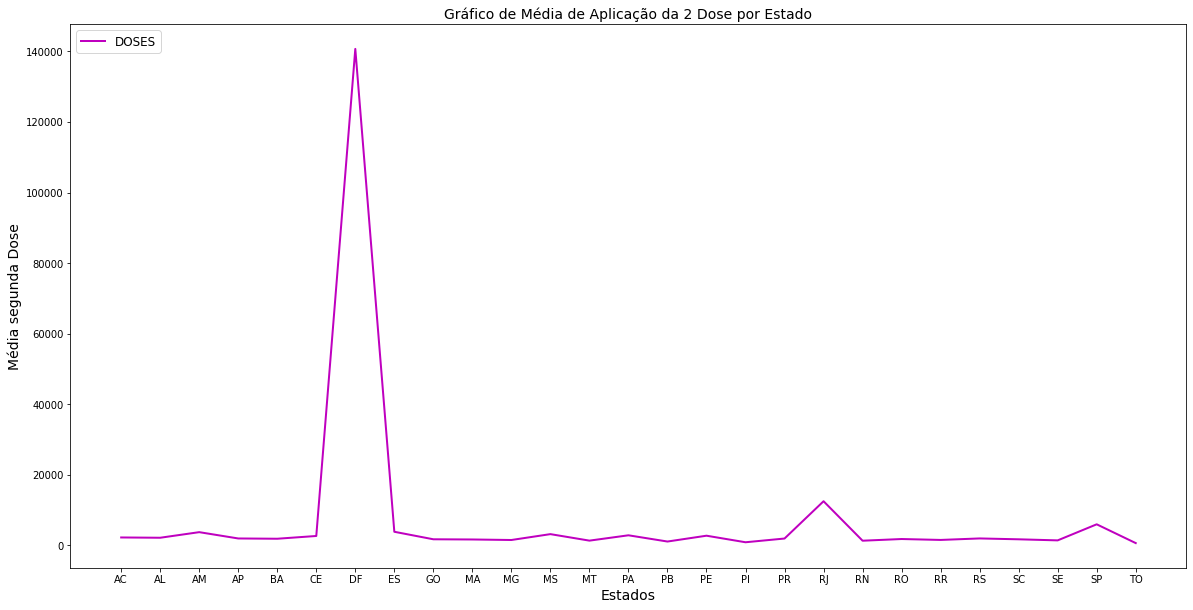

In [32]:
media_estado = grafico.media_estado_geral()
plt.figure(figsize=(20,10))
plt.plot(media_estado['Dose 2'], label = 'DOSES', color = 'm', lw = '2')
plt.legend(loc=2, fontsize=12)
plt.ylabel('Média segunda Dose',fontsize=14)
plt.xlabel('Estados',fontsize=14)
plt.title('Gráfico de Média de Aplicação da 2 Dose por Estado',fontsize=14)
plt.show()

MÉDIA DE APLICAÇÃO DA 1 E 2 DOSE POR ESTADO

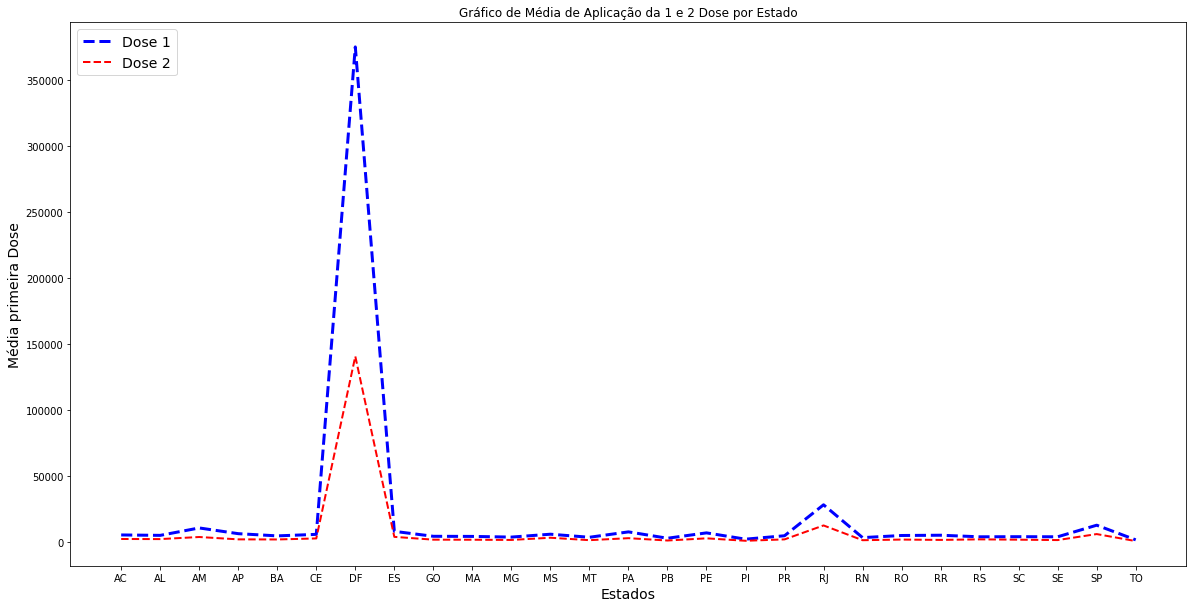

In [33]:
media_estado = grafico.media_estado_geral1()
media_estado2 = grafico.media_estado_geral()
plt.figure(figsize=(20,10))
plt.plot(media_estado['Dose 1'],label='Dose 1',ls='--',color = 'b', lw = '3')
plt.plot(media_estado2['Dose 2'],label='Dose 2',ls='--',color = 'r', lw = '2')
plt.legend(loc=2, fontsize=14)
plt.ylabel('Média primeira Dose', fontsize=14)
plt.xlabel('Estados',fontsize=14)
plt.title('Gráfico de Média de Aplicação da 1 e 2 Dose por Estado')


plt.show()

TOTAL 1  DOSE POR CAPITAL

In [34]:
total1 = grafico.codigo_capital('Dose 1')
total1 = total1.sort_values(by=['Dose 1'], ascending=False)
display(total1)

,Dose 1
Município,
São Paulo,9428542
Rio De Janeiro,5003961
Fortaleza,1957245
Brasília,1877153
Salvador,1789090
Belo Horizonte,1771165
Manaus,1430850
Curitiba,1282445
Porto Alegre,1012012


Gráfico de Aplicação da 1 e 2 Dose por CAPITAL

GRÁFICO DA APLICAÇÃO DA 1 DOSE POR CAPITAL

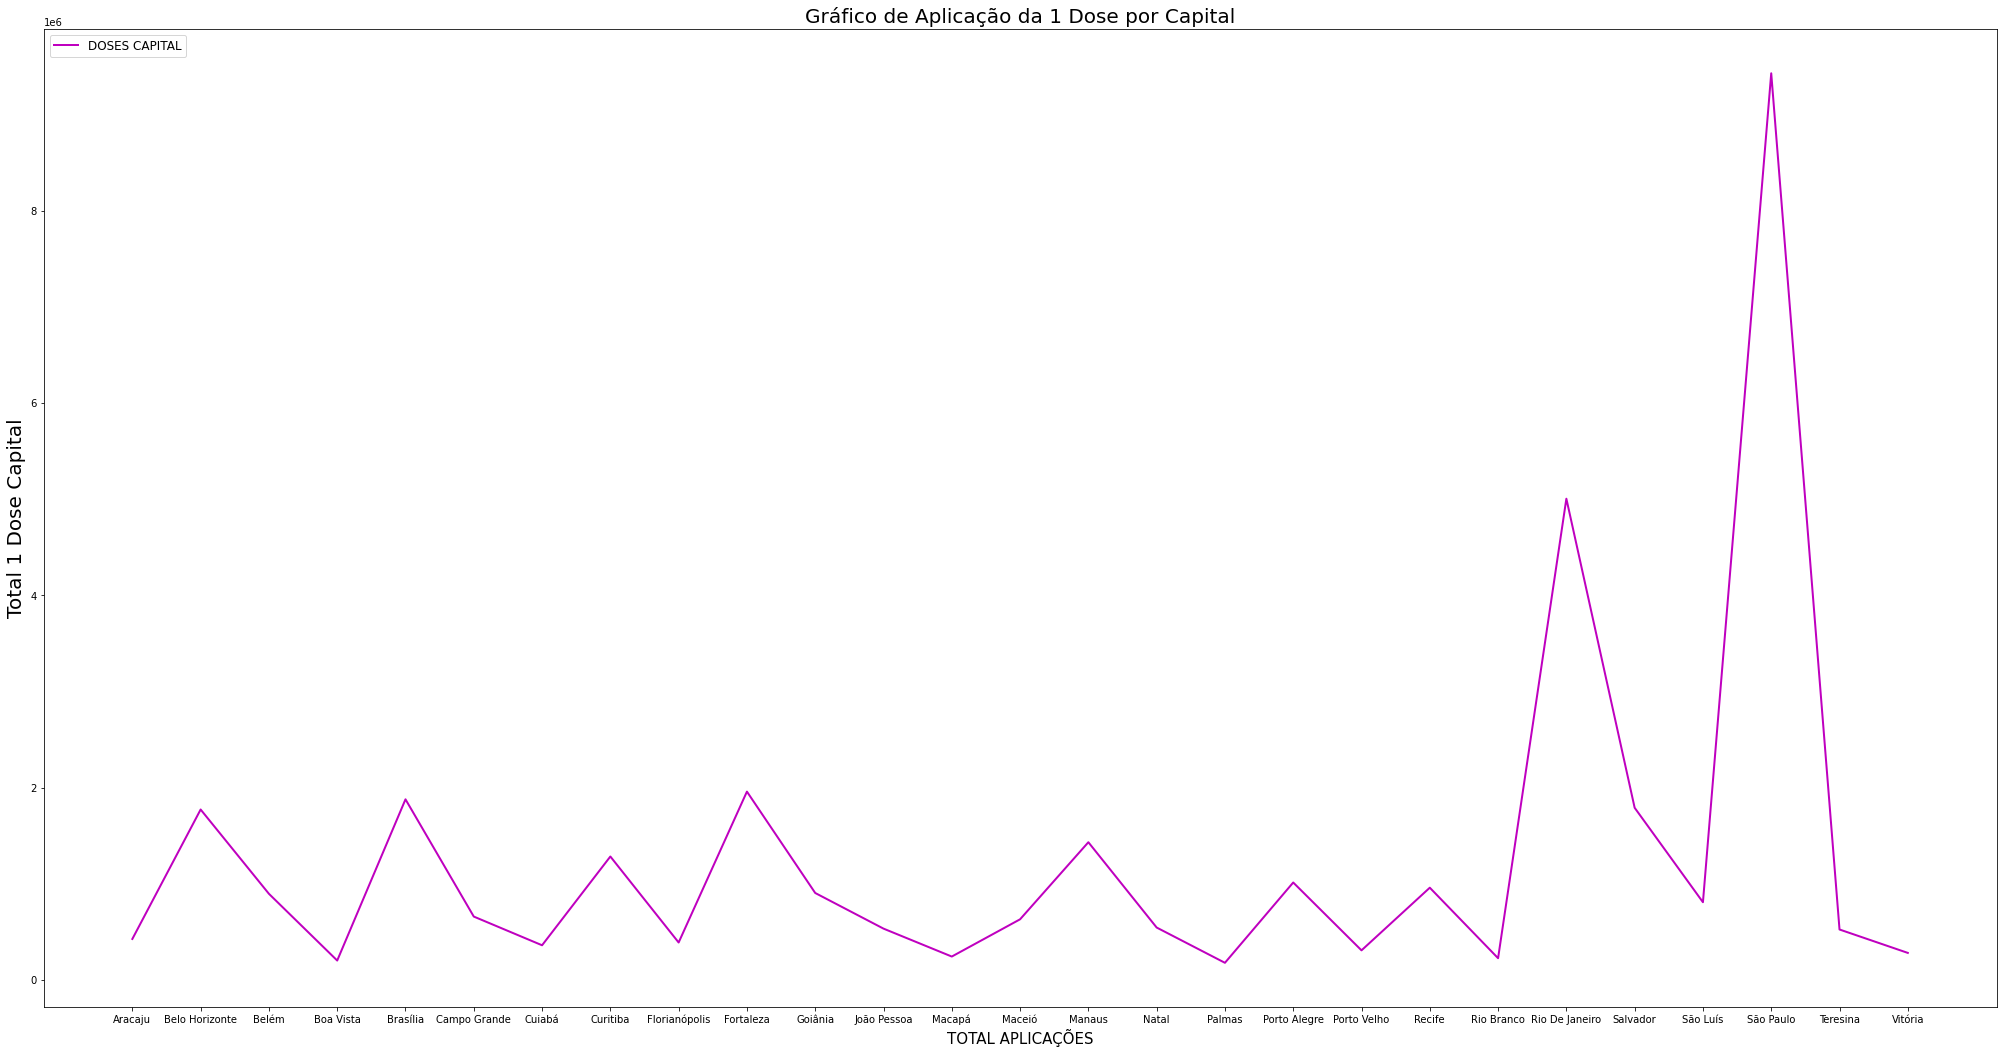

In [35]:
df1 = grafico.codigo_capital('Dose 1')
plt.figure(figsize=(35,18))
plt.plot(df1['Dose 1'], label = 'DOSES CAPITAL', color = 'm', lw = '2')
plt.legend(loc=2, fontsize=12)
plt.ylabel('Total 1 Dose Capital',fontsize=20)
plt.xlabel('TOTAL APLICAÇÕES',fontsize=15 )
plt.title('Gráfico de Aplicação da 1 Dose por Capital', fontsize=20)
plt.show()

TOTAL APLICAÇÃO 2 DOSE POR CAPITAL

In [36]:
total2 = grafico.codigo_capital('Dose 2')
total2 = total2.sort_values(by=['Dose 2'], ascending=False)
display(total2)


,Dose 2
Município,
São Paulo,4599633
Rio De Janeiro,2445219
Belo Horizonte,884648
Salvador,764388
Fortaleza,751850
Brasília,703619
Porto Alegre,604620
Curitiba,588190
Manaus,442323


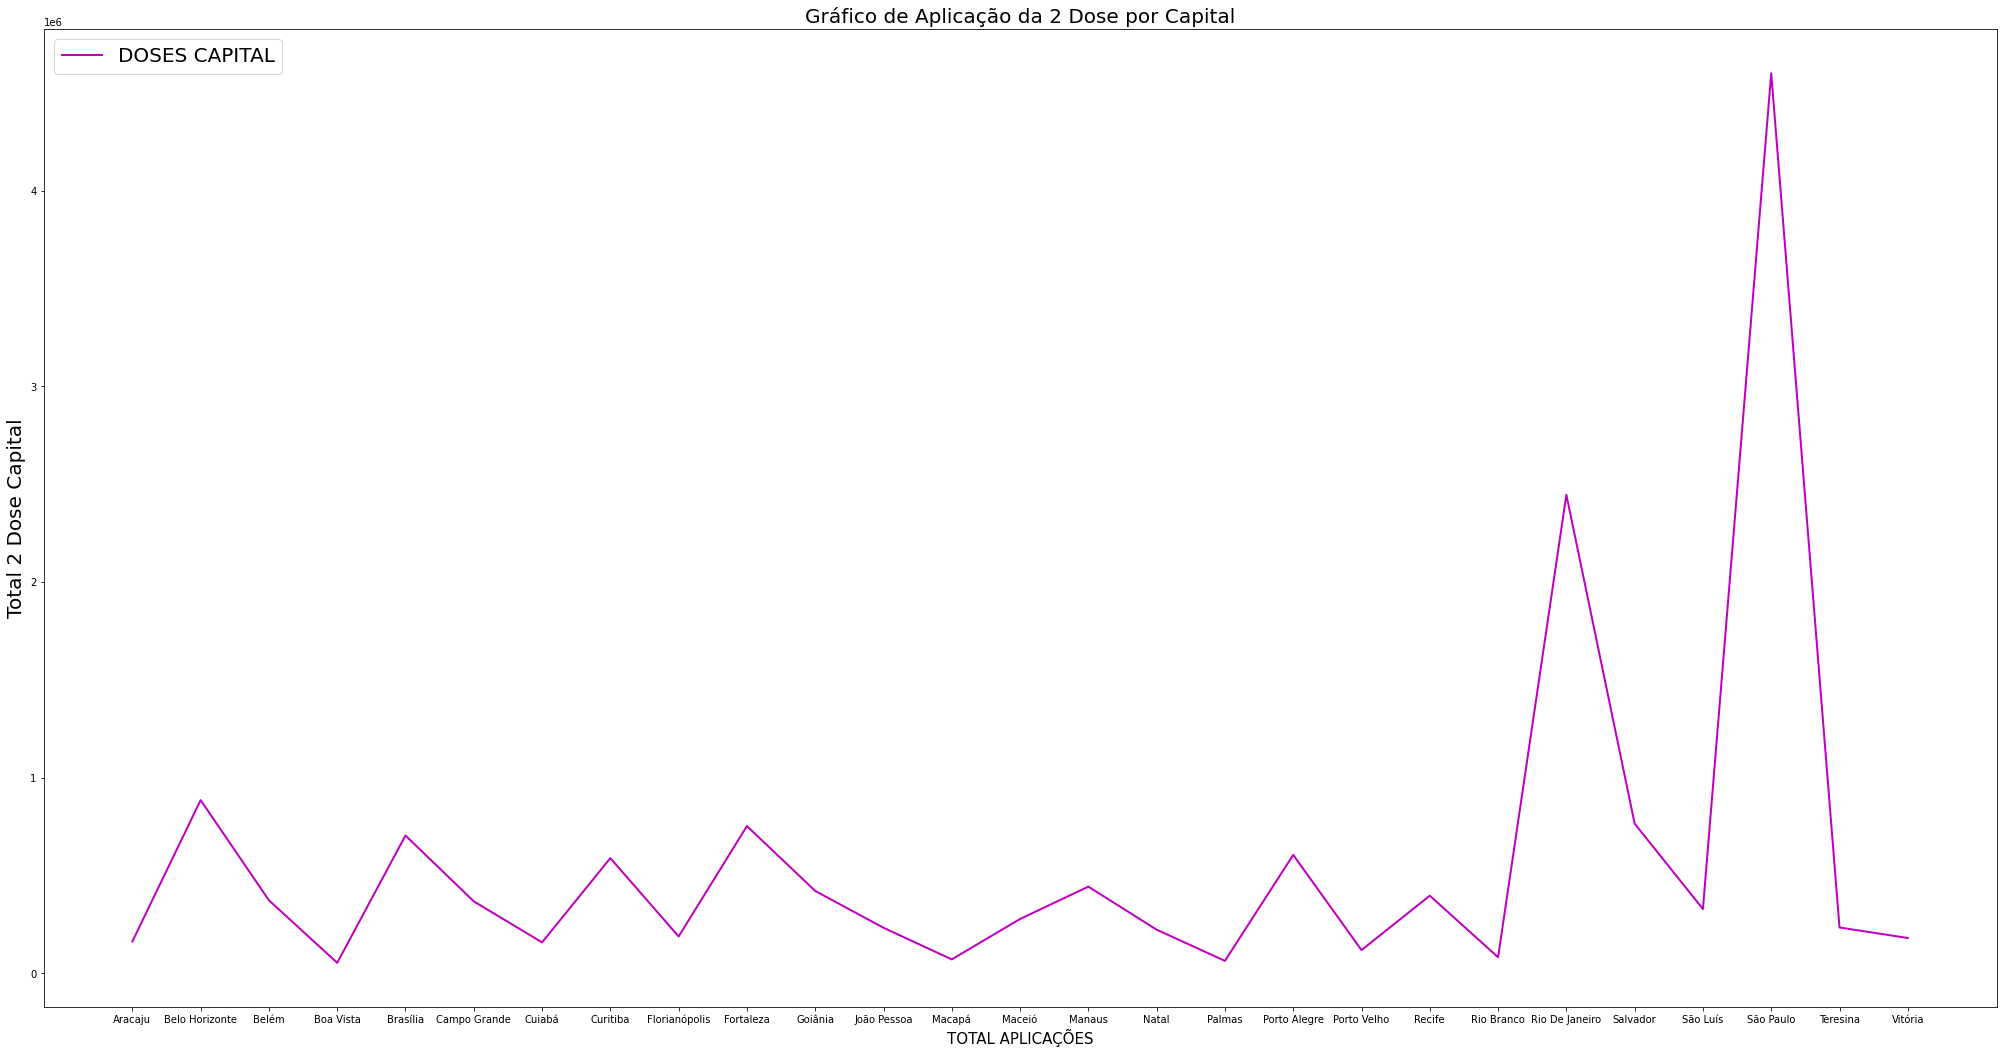

In [37]:
df2 = grafico.codigo_capital('Dose 2')
plt.figure(figsize=(35,18))
plt.plot(df2['Dose 2'], label = 'DOSES CAPITAL', color = 'm', lw = '2')
plt.legend(loc=2, fontsize=20)
plt.ylabel('Total 2 Dose Capital',fontsize=20)
plt.xlabel('TOTAL APLICAÇÕES',fontsize=15 )
plt.title('Gráfico de Aplicação da 2 Dose por Capital', fontsize=20)
plt.show()

GRÁFICO TOTAL APLICAÇÃO 2 DOSE POR CAPITAL

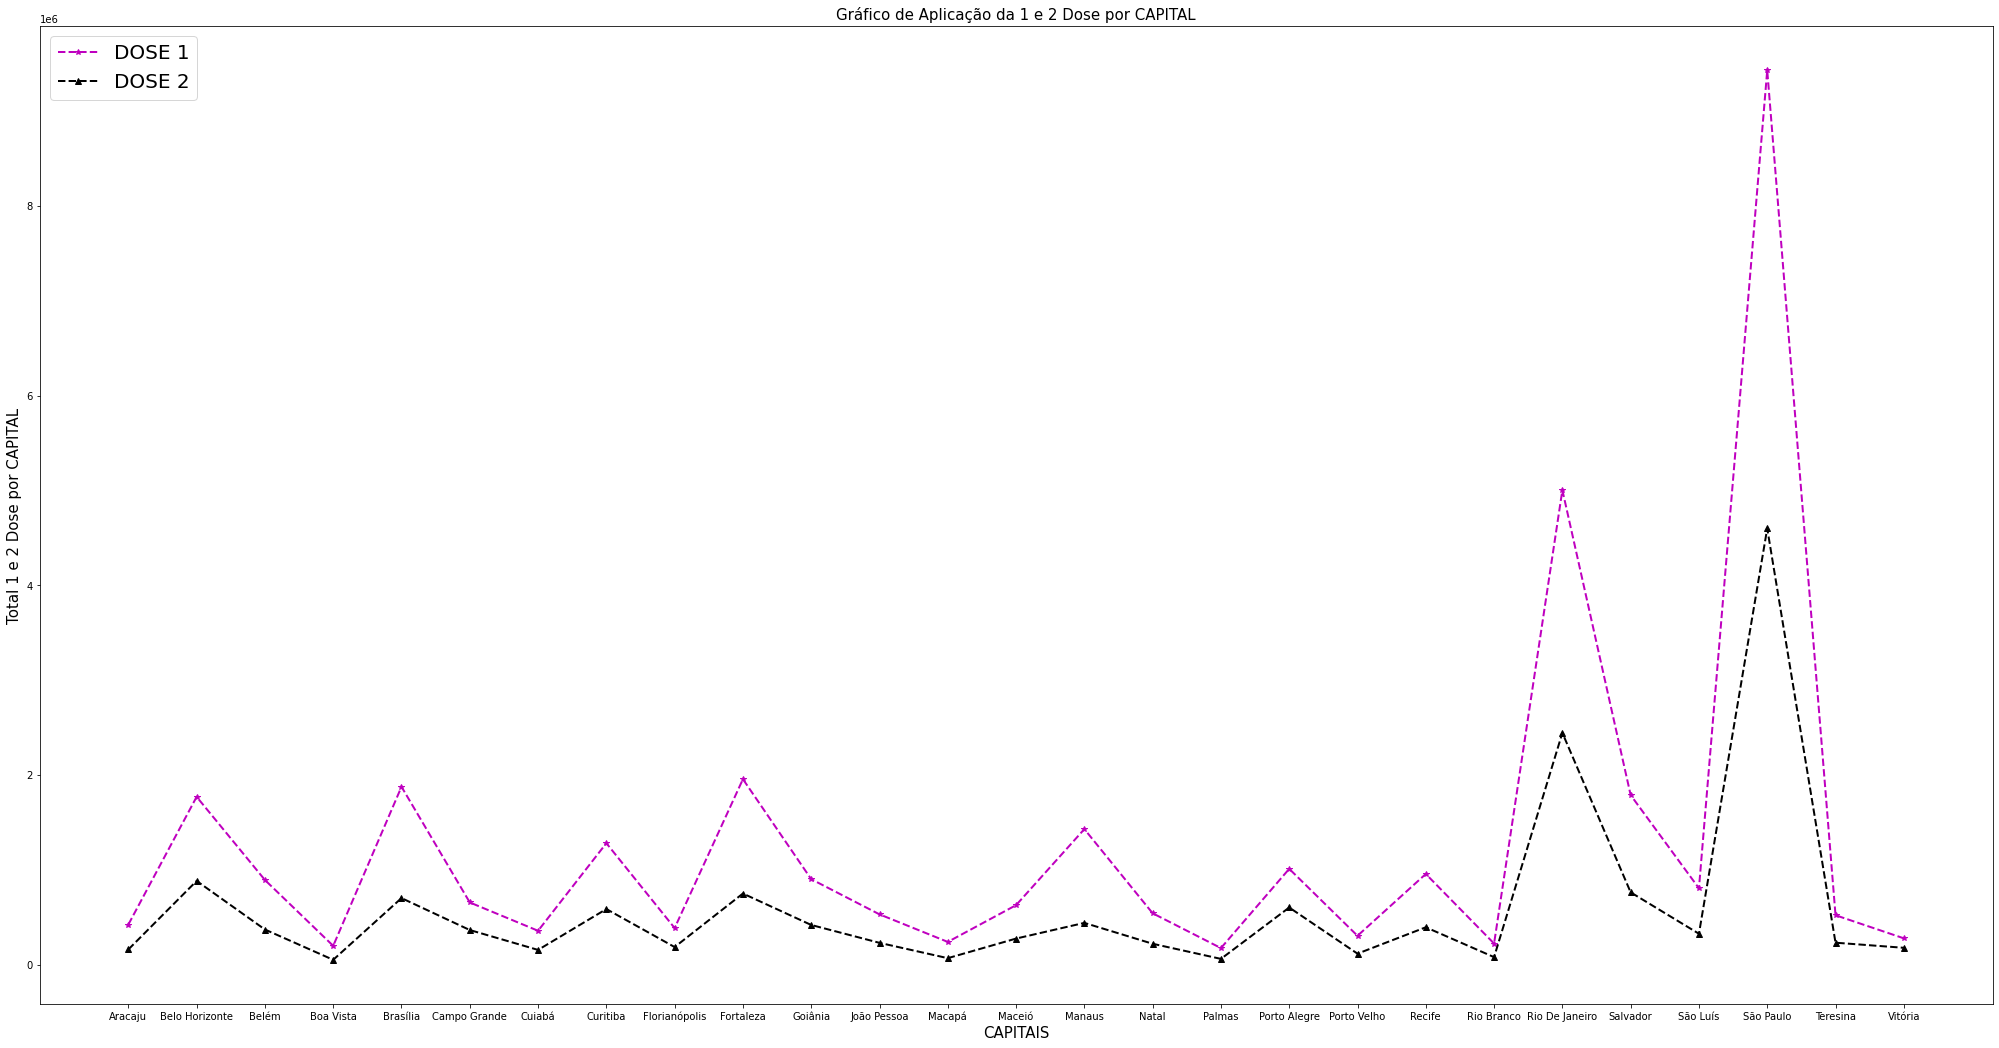

In [38]:
dose1_capital = grafico.codigo_capital('Dose 1')
dose2_capital = grafico.codigo_capital('Dose 2')
plt.figure(figsize=(35,18))
plt.plot(dose1_capital['Dose 1'], label = 'DOSE 1', color = 'm',ls='--', lw = '2',marker='*')
plt.plot(dose2_capital['Dose 2'], label = 'DOSE 2', color = 'k',ls='--', lw = '2',marker='^')
plt.legend(loc=2, fontsize=20)
plt.ylabel('Total 1 e 2 Dose por CAPITAL',fontsize=15)
plt.xlabel('CAPITAIS',fontsize=15)
plt.title('Gráfico de Aplicação da 1 e 2 Dose por CAPITAL',fontsize=15)
plt.show()

In [39]:
display(grafico.regiao_doses("Dose 1"))

,Dose 1
Região,
Centro-Oeste,9803815
Nordeste,28799245
Norte,8795259
Sudeste,57764153
Sul,19629197


In [40]:
display(grafico.regiao_doses("Dose 2"))

,Dose 2
Região,
Centro-Oeste,4039021
Nordeste,11547517
Norte,3175819
Sudeste,25969770
Sul,8724593


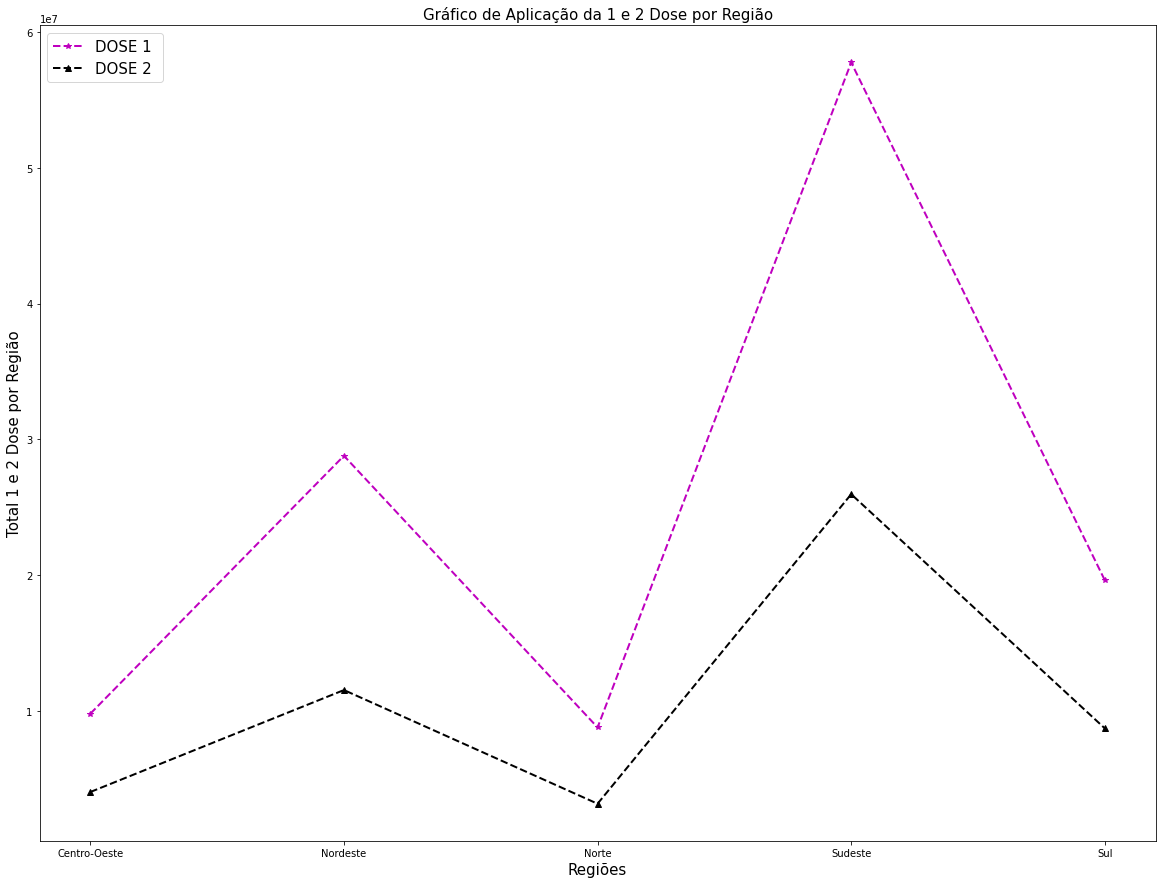

In [41]:
dose1_regiao = grafico.regiao_doses("Dose 1")
dose2_regiao = grafico.regiao_doses("Dose 2")
plt.figure(figsize=(20,15))
plt.plot(dose1_regiao['Dose 1'], label = 'DOSE 1 ', color = 'm',ls='--', lw = '2',marker='*')
plt.plot(dose2_regiao['Dose 2'], label = 'DOSE 2 ', color = 'k',ls='--', lw = '2',marker='^')
plt.legend(loc=2, fontsize=15)
plt.ylabel('Total 1 e 2 Dose por Região',fontsize=15)
plt.xlabel('Regiões',fontsize=15)
plt.title('Gráfico de Aplicação da 1 e 2 Dose por Região',fontsize=15)
plt.show()

df1 = pd.DataFrame(grafico.capitais(), columns = ['Capital','Dose 1'])
df2 = pd.DataFrame(grafico.capitais(), columns = ['Capital','Dose 2'])

plt.figure(figsize=(25,20))
plt.plot(df1['Dose 1'],df1['Capital'], label = 'DOSE 1 CAPITAL', color = 'r',ls='--', lw = '3',marker='o')
plt.plot(df2['Dose 2'],df2['Capital'], label = 'DOSE 2 CAPITAL', color = 'b',ls='--', lw = '3',marker='o')
plt.legend(loc=2, fontsize=12)
plt.ylabel('Total 1 e 2 Dose Capital',fontsize=20)
plt.xlabel('TOTAL APLICAÇÕES',fontsize=15 )
plt.title('Gráfico de Aplicação da 1 e 2 Dose por Capital', fontsize=20)

plt.show()



plt.figure(figsize=(30,30))
plt.plot(df2['Dose 2'],df2['Capital'], label = 'DOSES CAPITAL', color = 'm', lw = '2')
plt.legend(loc=2, fontsize=12)
plt.ylabel('Total 2 Dose Capital')
plt.xlabel('Capitais')
plt.title('Gráfico de Aplicação da 2 Dose por Capital')
plt.show()

df2 = pd.DataFrame(grafico.capitais(), columns = ['Capital','Dose 2'])

display(df2)

df1 = pd.DataFrame(grafico.capitais(), columns = ['Capital','Dose 1'])

display(df1)

 def codigo_capital(self, dose):
        codigo_capital = [110020,130260,120040,500270,160030,530010,140010,510340,172100,355030,221100,330455,150140,520870,292740,420540,
                 211130,270430,431490,410690,310620,230440,261160,250750,280030,240810,320530]
        
        capital = self.__dado[self.__dado['Cód. IBGE'].isin(codigo_capital)]

        capital = capital[['Município', dose]].groupby(['Município']).sum()
        return capital
    
    def capitais(self, municipio):
        codigo_capital = [110020,130260,120040,500270,160030,530010,140010,510340,172100,355030,221100,330455,150140,520870,292740,420540,
                 211130,270430,431490,410690,310620,230440,261160,250750,280030,240810,320530]
        
        capital = self.__dado[self.__dado['Cód. IBGE'].isin(codigo_capital)]
        capital = capital[['Município']].groupby([municipio]).sum()
        return capital